In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [2]:
# import urllib.request as req
# from urllib.error import HTTPError, URLError
# import requests
# from bs4 import BeautifulSoup

In [3]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys

# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.chrome.service import Service

# import time

In [4]:
# import json
# from glob import glob

---

# 1. 자동차등록대수

## (1) 데이터 처리

### 1) 데이터 로드

- 서울특별시_행정동별 자동차 등록대수 현황(공공데이터포털) : 2022 기준
- https://www.data.go.kr/data/15100168/fileData.do

In [5]:
cars_raw = pd.read_csv("../../Data/차,주차장/서울특별시_행정동별 자동차 등록대수 현황_20220430.csv",
           encoding="euc-kr")

In [6]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용본거지 시군구  3570 non-null   object 
 1   읍면동 (행정동)  3570 non-null   object 
 2   연료         3570 non-null   object 
 3   계          3506 non-null   float64
 4   관용_승용      3570 non-null   int64  
 5   관용_승합      3570 non-null   int64  
 6   관용_화물      3570 non-null   int64  
 7   관용_특수      3570 non-null   int64  
 8   자가용_승용     3570 non-null   int64  
 9   자가용승합      3570 non-null   int64  
 10  자가용화물      3570 non-null   int64  
 11  자가용특수      3570 non-null   int64  
 12  영업용_승용     3570 non-null   int64  
 13  영업용승합      3570 non-null   int64  
 14  영업용화물      3570 non-null   int64  
 15  영업용특수      3570 non-null   int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 446.4+ KB


In [7]:
car=cars_raw[["사용본거지 시군구", "읍면동 (행정동)","연료"]]

In [8]:
car.rename(columns={"사용본거지 시군구":"시군구",
                    "읍면동 (행정동)":"행정동"}, inplace=True)

C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\1726888252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.rename(columns={"사용본거지 시군구":"시군구",


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구     3570 non-null   object
 1   행정동     3570 non-null   object
 2   연료      3570 non-null   object
dtypes: object(3)
memory usage: 83.8+ KB


### 2) 시군구, 행정동 분리

In [10]:
sigungu_car=[]
for i in cars_raw["사용본거지 시군구"].str.split(" ") :
    sigungu_car.append(i[1])

In [11]:
dong_car=[]
for i in cars_raw["읍면동 (행정동)"].str.split(" ") :
    dong_car.append(i[1])

In [12]:
car["시군구"]=sigungu_car
car["행정동"]=dong_car

C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\1988335006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["시군구"]=sigungu_car
C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\1988335006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["행정동"]=dong_car


### 3) 차량 용도별 합계

In [13]:
car["관용합계"]=cars_raw["관용_승용"]+cars_raw["관용_승합"]+cars_raw["관용_화물"]+cars_raw["관용_특수"]
car["자가용합계"]=cars_raw["자가용_승용"]+cars_raw["자가용승합"]+cars_raw["자가용화물"]+cars_raw["자가용특수"]
car["영업용합계"]=cars_raw["영업용_승용"]+cars_raw["영업용승합"]+cars_raw["영업용화물"]+cars_raw["영업용특수"]
car["차량합계"]=car["관용합계"]+car["자가용합계"]+car["영업용합계"]

C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\3197062585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["관용합계"]=cars_raw["관용_승용"]+cars_raw["관용_승합"]+cars_raw["관용_화물"]+cars_raw["관용_특수"]
C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\3197062585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["자가용합계"]=cars_raw["자가용_승용"]+cars_raw["자가용승합"]+cars_raw["자가용화물"]+cars_raw["자가용특수"]
C:\Users\acorn\AppData\Local\Temp\ipykernel_9660\3197062585.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [14]:
car["차량합계"].sum()

3182255

In [15]:
car.head()

,시군구,행정동,연료,관용합계,자가용합계,영업용합계,차량합계
0,종로구,기타,휘발유,0,1,0,1
1,종로구,기타,휘발유,0,2,0,2
2,종로구,기타,휘발유,0,1,0,1
3,종로구,기타,경유,0,1,0,1
4,종로구,기타,경유,0,1,0,1


## (2) 구별, 행정동별 자동차등록대수

### 1) 구별

In [63]:
gu_car= car.groupby("시군구")[["차량합계"]].sum()
gu_car.head()

,차량합계
시군구,
강남구,245487
강동구,151959
강북구,75122
강서구,206522
관악구,118273


### ※ 구별차량등록대수 저장(check piont)

In [17]:
# gu_car.to_csv("../../Data/차,주차장/구별차량등록대수.csv")

### 2) 광진구 행정동별

In [18]:
gj_car= car[car["시군구"]=="광진구"]
gj_car.head()

,시군구,행정동,연료,관용합계,자가용합계,영업용합계,차량합계
557,광진구,기타,휘발유,0,1,0,1
558,광진구,기타,경유,0,2,0,2
559,광진구,기타,휘발유,0,3,0,3
560,광진구,기타1,경유,0,2,0,2
561,광진구,화양동,휘발유,0,2009,197,2206


In [19]:
gj_car.loc[gj_car["행정동"].str.contains("기타"), "행정동"] = "기타"

In [64]:
gj_dong_car = gj_car.groupby("행정동")[["차량합계"]].sum()
gj_dong_car.head()

,차량합계
행정동,
광장동,11677
구의1동,6686
구의2동,7279
구의3동,9168
군자동,5160


### 3) 행정동 통일

In [21]:
gj_car2=gj_car.copy()

In [22]:
gj_car2.loc[gj_car2["행정동"].str.contains("구의"), "행정동"] = "구의동"
gj_car2.loc[gj_car2["행정동"].str.contains("자양"), "행정동"] = "자양동"
gj_car2.loc[gj_car2["행정동"].str.contains("중곡"), "행정동"] = "중곡동"

In [67]:
gj_dong_car2=gj_car2.groupby("행정동")[["차량합계"]].sum()
gj_dong_car2.sort_values(by="차량합계",ascending=False)

,차량합계
행정동,
자양동,30457
구의동,23133
중곡동,21432
광장동,11677
군자동,5160
화양동,4140
능동,3050
기타,66


### (3) 시각화

<AxesSubplot:ylabel='시군구'>

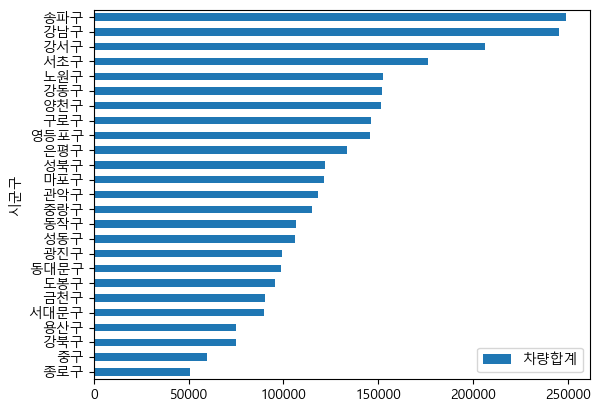

In [70]:
gu_car.sort_values(by="차량합계").plot.barh()

<AxesSubplot:ylabel='행정동'>

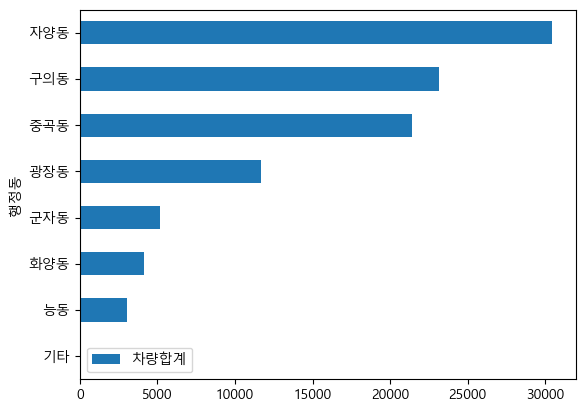

In [72]:
gj_dong_car2.sort_values(by="차량합계").plot.barh()

# 2. 주차면수

## (1) 데이터 처리

### 1) 데이터 로드

- 서울시 주차장 (동별) 통계(서울시열린광장) : 2022 기준
- https://data.seoul.go.kr/dataList/10152/S/2/datasetView.do

In [24]:
park_raw = pd.read_csv("../../Data/차,주차장/주차장(동별).csv", skiprows=3 )
park_raw.info()
park_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   동별(1)       452 non-null    object
 1   동별(2)       452 non-null    object
 2   동별(3)       452 non-null    object
 3   개소 (개소)     452 non-null    int64 
 4   면수 (면수)     452 non-null    int64 
 5   개소 (개소).1   452 non-null    object
 6   면수 (면수).1   452 non-null    object
 7   개소 (개소).2   452 non-null    int64 
 8   면수 (면수).2   452 non-null    int64 
 9   개소 (개소).3   452 non-null    object
 10  면수 (면수).3   452 non-null    object
 11  개소 (개소).4   452 non-null    object
 12  면수 (면수).4   452 non-null    object
 13  개소 (개소).5   452 non-null    object
 14  면수 (면수).5   452 non-null    object
 15  개소 (개소).6   452 non-null    object
 16  면수 (면수).6   452 non-null    object
 17  개소 (개소).7   452 non-null    object
 18  면수 (면수).7   452 non-null    object
 19  개소 (개소).8   452 non-null    object
 20  면수 (면수).8 

,동별(1),동별(2),동별(3),개소 (개소),면수 (면수),개소 (개소).1,면수 (면수).1,개소 (개소).2,면수 (면수).2,개소 (개소).3,...,개소 (개소).9,면수 (면수).9,개소 (개소).10,면수 (면수).10,개소 (개소).11,면수 (면수).11,개소 (개소).12,면수 (면수).12,개소 (개소).13,면수 (면수).13
0,합계,소계,소계,309726,4501875,12304,177281,297422,4324594,11235,...,788,28279,296634,4296315,115597,282426,87393,2361583,93644,1652306
1,합계,종로구,소계,8232,92062,185,5833,8047,86229,147,...,60,1206,7987,85023,2658,6748,1448,25103,3881,53172
2,합계,종로구,사직동,362,12605,17,1422,345,11183,13,...,5,115,340,11068,76,370,64,2442,200,8256
3,합계,종로구,삼청동,343,2237,16,122,327,2115,14,...,3,114,324,2001,84,183,9,68,231,1750
4,합계,종로구,부암동,596,3533,10,141,586,3392,8,...,-,-,586,3392,315,687,145,1202,126,1503


In [25]:
park_raw.columns=["합계","시군구","행정동",
                 "합계개소","합계면수","공영개소","공영면수","민영개소","민영면수",
                 "노상개소","노상면수","노상시영개소","노상시영면수","노상구영개소","노상구영면수",
                "노외개소", "노외면수","노외시영개소","노외시영면수","노외구영개소",
                 "노외구영면수","노외민영개소","노외민영면수",
                 "건축물부설개소","건축물부설면수",
                 "건축물부설일반주택개소", "건축물부설일반주택면수",
                 "건축물부설공동주택개소", "건축물부설공동주택면수",
                 "건축물부설일반건축물개소", "건축물부설일반건축물면수"]

In [26]:
del park_raw["합계"]

In [27]:
park_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   시군구           452 non-null    object
 1   행정동           452 non-null    object
 2   합계개소          452 non-null    int64 
 3   합계면수          452 non-null    int64 
 4   공영개소          452 non-null    object
 5   공영면수          452 non-null    object
 6   민영개소          452 non-null    int64 
 7   민영면수          452 non-null    int64 
 8   노상개소          452 non-null    object
 9   노상면수          452 non-null    object
 10  노상시영개소        452 non-null    object
 11  노상시영면수        452 non-null    object
 12  노상구영개소        452 non-null    object
 13  노상구영면수        452 non-null    object
 14  노외개소          452 non-null    object
 15  노외면수          452 non-null    object
 16  노외시영개소        452 non-null    object
 17  노외시영면수        452 non-null    object
 18  노외구영개소        452 non-null    object
 19  노외구영면수  

In [28]:
park = park_raw[["시군구","행정동","합계면수","공영면수","민영면수"]]

In [29]:
park = park[park["행정동"] != "소계"]

### (2) 구별, 행정동별 주차면수

### 1) 구별

In [30]:
gu_park = park.groupby("시군구")[["합계면수"]].sum()
gu_park.sum()

합계면수    4501875
dtype: int64

### 2) 광진구 행정동별

In [31]:
gj_park = park[park["시군구"]== "광진구"]
gj_dong_park = gj_park.groupby("행정동")[["합계면수"]].sum()

In [32]:
gj_dong_park.head()

,합계면수
행정동,
광장동,16425
구의1동,8621
구의2동,8722
구의3동,14788
군자동,7263


### 3) 행정동 통일

In [33]:
gj_park2=gj_dong_park.reset_index()

In [34]:
gj_park2.loc[gj_park2["행정동"].str.contains("구의"), "행정동"] = "구의동"
gj_park2.loc[gj_park2["행정동"].str.contains("자양"), "행정동"] = "자양동"
gj_park2.loc[gj_park2["행정동"].str.contains("중곡"), "행정동"] = "중곡동"

In [74]:
gj_dong_pakr2=gj_park2.groupby("행정동")[["합계면수"]].sum()
gj_dong_pakr2

,합계면수
행정동,
광장동,16425
구의동,32131
군자동,7263
능동,6560
자양동,36322
중곡동,25041
화양동,10647


### 4) 시각화

<AxesSubplot:ylabel='시군구'>

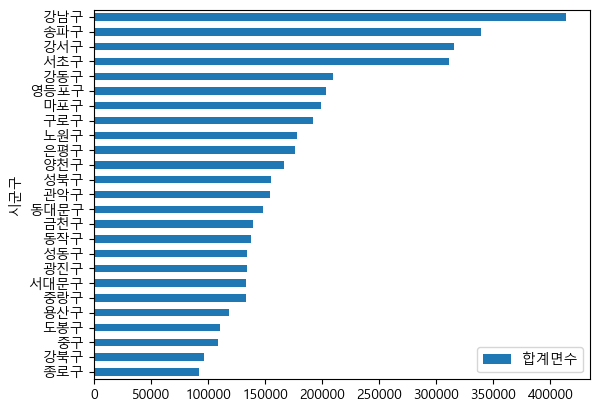

In [73]:
gu_park.sort_values(by="합계면수").plot.barh()

<AxesSubplot:ylabel='행정동'>

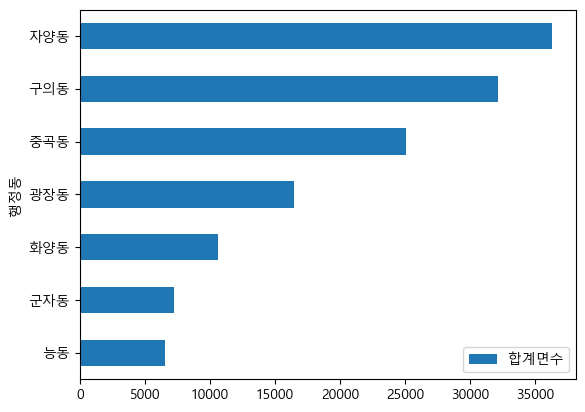

In [75]:
gj_dong_pakr2.sort_values(by="합계면수").plot.barh()

# 3. 구별 차량확보율

### (1) 병합

In [57]:
p=pd.merge(gu_car, gu_park, on="시군구")
p

,차량합계,합계면수
시군구,,
강남구,245487,413898
강동구,151959,209959
강북구,75122,96636
강서구,206522,315812
관악구,118273,153960
광진구,99115,134389
구로구,146038,191823
금천구,90501,139148
노원구,152375,178194


### (2) 주차장 확보율

In [37]:
p["주차장확보율"] = p["합계면수"]/p["차량합계"]*100

In [38]:
p.sort_values(by="주차장확보율", ascending=False)

,차량합계,합계면수,주차장확보율
시군구,,,
중구,59744,109153,182.701192
종로구,50756,92062,181.381512
서초구,176494,310949,176.181060
강남구,245487,413898,168.602818
마포구,121250,199423,164.472577
용산구,75234,118632,157.684026
금천구,90501,139148,153.752997
강서구,206522,315812,152.919302
동대문구,98603,148103,150.201312


In [39]:
# 구별 평균

p["주차장확보율"].mean()

141.9911576615607

### (3) 시각화

In [40]:
import json
geo=json.load(open("../../Data/기타/skorea_municipalities_geo_simple_seoul.json",
                  encoding="utf-8"))

In [51]:
# 지도 시각화

import folium

map = folium.Map(location=[37.5000195, 127.0229206],zoom_start=11)

# path = "../../Data/기타/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data=geo,  data=p["주차장확보율"], 
               key_on="feature.id",
               columns=[p.index, p["주차장확보율"]],
               fill_color="PuRd")
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<AxesSubplot:ylabel='시군구'>

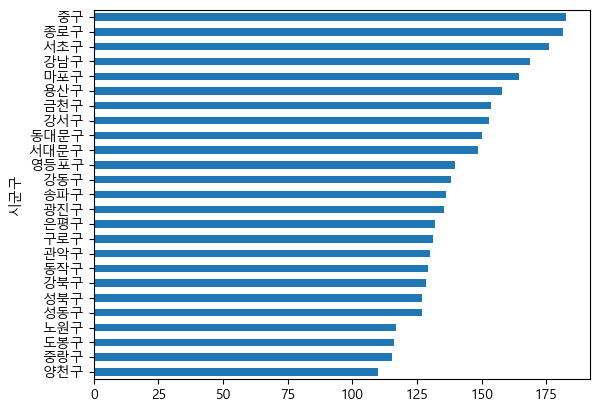

In [42]:
# 막대그래프

p["주차장확보율"].sort_values().plot(kind="barh")

In [43]:
# p["정규화"]=(p["차량대비면수"]-p["차량대비면수"].min())/(p["차량대비면수"].max()-p["차량대비면수"].min())

In [44]:
# p.sort_values(by="정규화", ascending=False)

### ※ 구별 차량대비 주차면수 저장(check piont)

In [45]:
# p.to_csv("../../Data/차,주차장/구별 차량대비 주차면수.csv")

# 4. 동별 주차장 확보율

- 결과 : 광진구의 주차장 확보율이 100이 넘는 반면 행정동별 주차장 확보율은 100을 넘지 못함
        화양동의 주차장 확보율이 가장 낮음

In [48]:
res_dong=pd.merge(gj_dong_car2,gj_dong_pakr2,on="행정동")
res_dong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 광장동 to 화양동
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   차량합계    7 non-null      int64
 1   합계면수    7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [49]:
res_dong["주차장확보율"]=res_dong["차량합계"]/res_dong["합계면수"]*100

In [50]:
res_dong.sort_values(by="주차장확보율",ascending=False)

,차량합계,합계면수,주차장확보율
행정동,,,
중곡동,21432,25041,85.587636
자양동,30457,36322,83.852761
구의동,23133,32131,71.995892
광장동,11677,16425,71.092846
군자동,5160,7263,71.045023
능동,3050,6560,46.493902
화양동,4140,10647,38.884193


### 1) 시각화

<AxesSubplot:ylabel='행정동'>

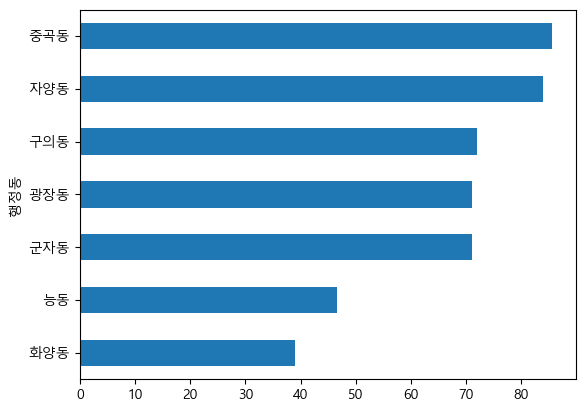

In [60]:
res_dong["주차장확보율"].sort_values().plot.barh()

#### ※ 광진구동별주차장확보율 저장(check point)

In [59]:
res_dong.to_csv("../../Data/차,주차장/광진구동별주차장확보율.csv",
                encoding="utf-8")